# Regression Models 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price.

## 1. Explore this dataset using what you have learned in data preprocessing and data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('data/kc_house_data.csv') 
# Print the first 5 rows of the dataset
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Print the data information of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

the only column with non numerical values is date and we don't need it here

In [4]:
#drop the useless columns 
df.drop(['id', 'date'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Check for missing values in the dataset
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in this dataset

### Let's start by identifying quantative and categorical variables 

<Figure size 1080x1080 with 0 Axes>

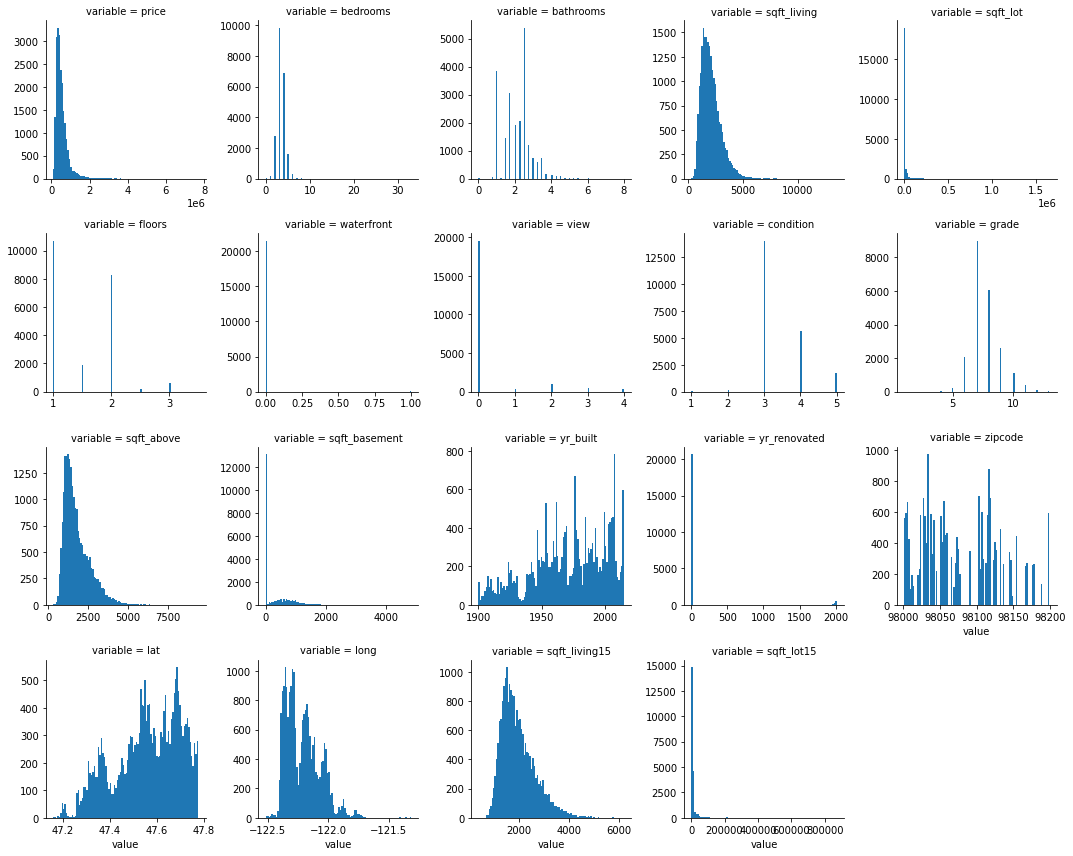

In [12]:
# distribution of all the variables
plt.figure(figsize=[15,15])
f = pd.melt(df)
facet=sns.FacetGrid(data=f, col="variable", col_wrap=5, sharex=False, sharey=False)

facet=facet.map(plt.hist,"value", bins=100) 

In [14]:
#from the above plots we identify the following as categorical variables 
cat_columns = ["condition","waterfront","view","grade","zipcode"]

#convert them into category type
df[cat_columns]=df[cat_columns].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  int64   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  int64   
 4   sqft_lot       21613 non-null  int64   
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  category
 7   view           21613 non-null  category
 8   condition      21613 non-null  category
 9   grade          21613 non-null  category
 10  sqft_above     21613 non-null  int64   
 11  sqft_basement  21613 non-null  int64   
 12  yr_built       21613 non-null  int64   
 13  yr_renovated   21613 non-null  int64   
 14  zipcode        21613 non-null  category
 15  lat            21613 non-null  float64 
 16  long           21613 non-null  float64 
 17  sqft_living15  21613 non-null  

### Let's visualize the correlation between numerical variables and the target

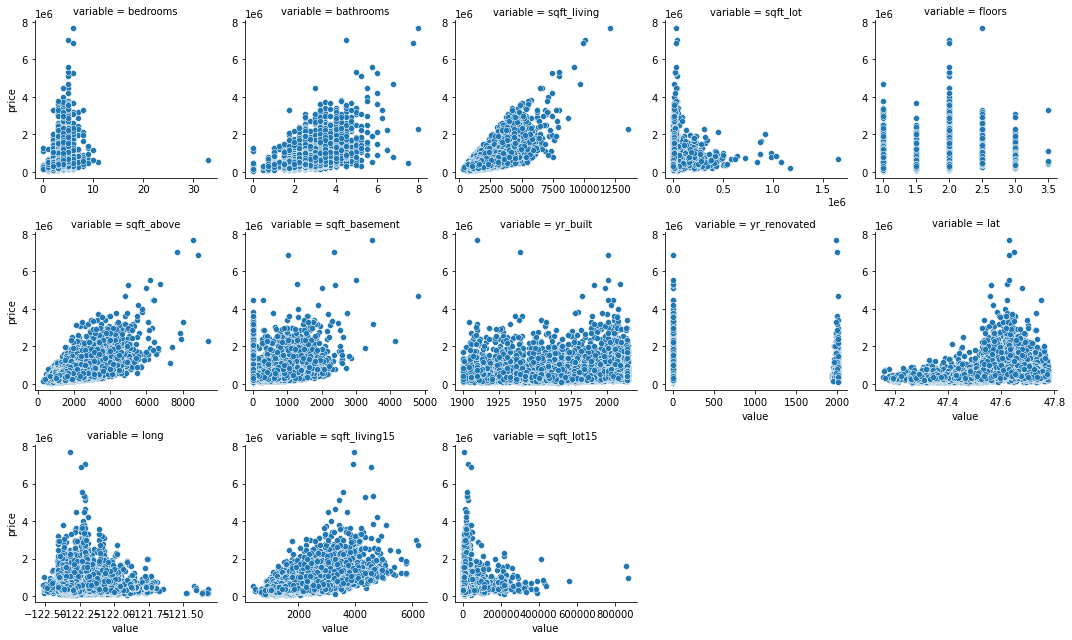

In [18]:
df_numerical=df.select_dtypes(include= np.number)

f = pd.melt(df,id_vars=["price"],value_vars= df_numerical.columns)
facet=sns.FacetGrid(data=f,col="variable",col_wrap=5,sharex=False,sharey=False)

facet=facet.map(sns.scatterplot,"value","price")

### Let's visualize correlation between categorical variables and the target

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 3240x720 with 0 Axes>

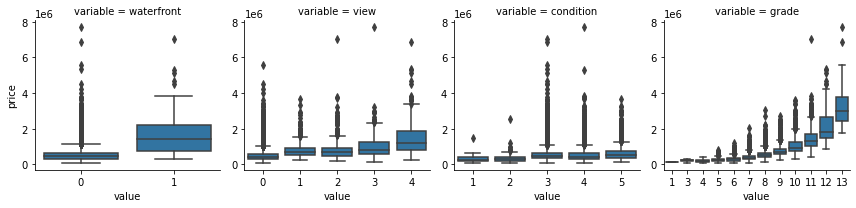

In [21]:
plt.figure(figsize=(45,10))
columns = df.drop("zipcode",axis=1).select_dtypes(include="category").columns
f = pd.melt(df,id_vars=["price"],value_vars=columns)
facet=sns.FacetGrid(data=f,col="variable",col_wrap=4,sharex=False,sharey=False)

facet=facet.map(sns.boxplot,"value","price") 

<AxesSubplot:xlabel='zipcode', ylabel='price'>

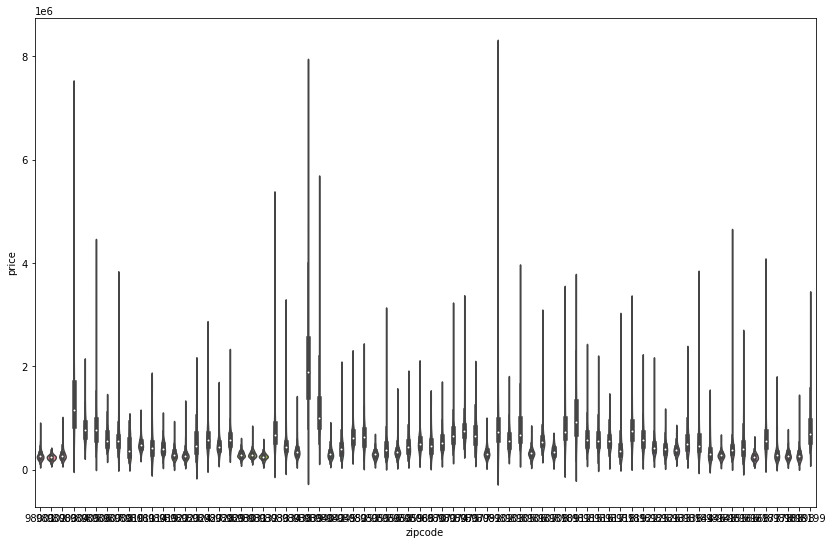

In [23]:
plt.figure(figsize=(14,9))
sns.violinplot(x='zipcode', y='price', data=df)

## 2. Feature selection 

For that we'll calculate the correlation coefficient between each input feature and the target variable and select the features with the highest correlation coefficients.

<AxesSubplot:>

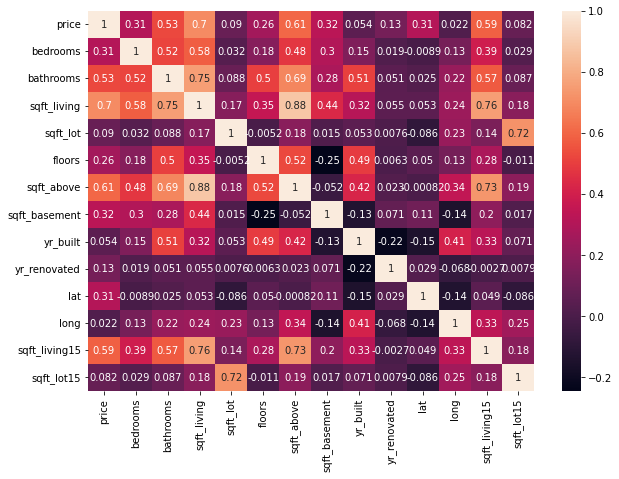

In [26]:
plt.figure(figsize=[10,7])
corr=df.corr()
sns.heatmap(corr,annot=True)

In [27]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
long             0.021626
Name: price, dtype: float64

We can see that sqft_living has the biggest correlation with the target. Se we select this feature.

## 3. Split your dataset into a training set and a testing set. 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
X = df["sqft_living"].values.reshape(-1,1)
y= df["price"]
SEED=30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=SEED)

## 4. Apply linear regression to your training set.

In [32]:
model=LinearRegression()

model.fit(X_train,y_train)

pred=model.predict(X_test)

## 5. Plot the linear regression.

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.05, 0.5, '$y = 282.54 x_1 - 46813.82 $')

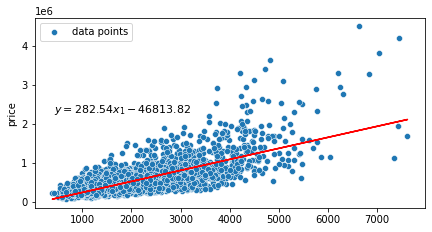

In [33]:
fig, ax = plt.subplots(figsize=(7, 3.5))

sns.scatterplot(X_test.squeeze(),y_test,label="data points",ax=ax)
plt.plot(X_test.squeeze(),pred,color="r",label="regression model")
ax.text(0.05, 0.50, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=11, transform=ax.transAxes)


## 5. Measure the performance of linear regression using the testing set. 

In [34]:
print("MSE ",mean_squared_error(y_test,pred))
print("R^2 ",r2_score(y_test,pred))

MSE  64179676631.68388
R^2  0.4879814110728805


## 6. Apply multiple-linear regression and compare it to the linear model. 


let's add the 3 best correlated features with the target

In [47]:
# Create feature matrix X and target vector y
X = df[['sqft_living', 'sqft_above', 'sqft_living15']]
y = df['price']

SEED=30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=SEED)

In [48]:
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("MSE ",mean_squared_error(y_test,pred))
print("R^2 ",r2_score(y_test,pred))

MSE  66888776466.63868
R^2  0.5002445400223894


We can see that it's better than linear regression

## 7. Apply polynomial regression and compare it to linear and multilinear regression.

In [49]:
from sklearn.preprocessing import PolynomialFeatures


model = LinearRegression() 

poly = PolynomialFeatures(degree=2)
X = df["sqft_living"].values.reshape(-1,1)
y= df["price"]

SEED=30

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=SEED)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
model=model.fit(X_train_,y_train)
poly_pred = model.predict(X_test_)

In [51]:
print("MSE: ", mean_squared_error(y_test, poly_pred))
print("R ^2: ", r2_score(y_test,poly_pred))

MSE:  60618945048.17094
R ^2:  0.5470892073946685


the polynomial regression is better than multilinear regression